In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load images
train_images = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\train_images.txt') 
# load labels as int
train_labels = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\train_labels.txt').astype(np.int64)

# load images
test_images = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\test_images.txt') 
# load labels as int
test_labels = np.loadtxt('E:\\facultate\Anul 2, sem II\IA\ML\lab2\data\\test_labels.txt').astype(np.int64)

print(train_images)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
print(np.shape(train_images))

(1000, 784)


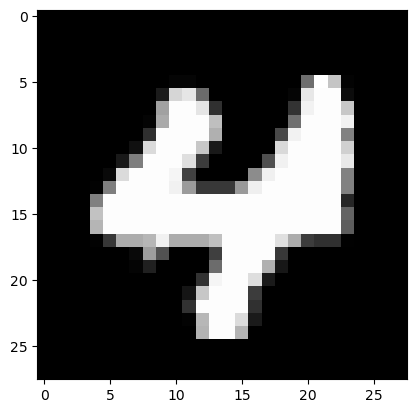

In [4]:
# first image
image = train_images[0, :]
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [5]:
# 1.
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
# 2.
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'):
        if metric == 'l1':
            distances = np.sum(np.abs(self.train_images - test_image), axis = 1)
        elif metric == 'l2':
            distances = np.sqrt(np.sum((self.train_images - test_image)**2, axis = 1))
        k_indices = np.argsort(distances)[:num_neighbors]
        k_labels = self.train_labels[k_indices]
        return np.bincount(k_labels).argmax()
# 3.
    def classify_images(self, test_images, num_neighbors = 3, metric = 'l2'):
        predictions = np.array([self.classify_image(x, num_neighbors, metric) for x in test_images])
        return predictions
# 4.
    def accuracy_score(self, test_images, test_labels, num_neighbors = 3, metric = 'l2'):
        predictions = self.classify_images(test_images, num_neighbors, metric)
        return np.mean(predictions == test_labels)

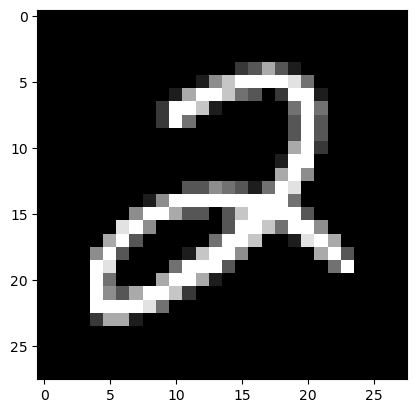

In [6]:
# 2.
# first test image
image = test_images[0, :]
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [7]:
knnClassifier = KnnClassifier(train_images, train_labels)
knnClassifier.classify_image(test_images[0, :])

2

In [8]:
# 3.
predictions = knnClassifier.classify_images(test_images)
print(predictions)


[2 7 3 1 2 1 0 5 1 4 7 3 2 6 8 3 8 9 9 1 8 2 0 0 5 4 6 2 6 7 3 2 4 7 6 6 1
 7 5 1 0 1 1 2 2 1 3 7 9 6 7 6 7 7 5 7 3 1 2 1 7 8 0 1 8 3 1 6 0 5 8 6 6 3
 2 9 7 0 9 1 4 4 3 3 1 4 0 5 7 9 0 5 2 3 4 4 4 9 5 0 0 6 8 4 6 0 7 5 8 0 7
 9 3 0 5 7 5 3 5 7 3 9 9 4 1 9 3 0 6 1 0 9 1 6 6 3 7 0 2 8 7 0 4 2 1 3 6 5
 5 3 4 3 0 0 3 6 3 2 0 1 6 4 3 2 5 3 8 4 1 8 5 3 7 4 2 8 0 0 0 3 1 6 6 2 5
 2 9 2 7 3 5 8 7 0 0 3 7 8 6 7 8 7 0 5 3 2 8 2 4 7 8 4 4 4 5 2 7 6 3 9 6 5
 6 0 1 9 6 0 2 5 9 2 8 9 1 9 6 2 6 9 4 4 5 2 4 5 3 8 3 8 8 4 1 0 4 8 2 9 3
 4 9 5 4 0 1 7 7 4 5 0 1 3 7 5 6 9 2 1 2 8 9 6 8 7 6 4 0 5 3 3 5 6 6 5 3 2
 5 3 6 1 1 7 0 8 1 3 2 1 0 0 8 0 0 1 1 6 4 3 4 2 7 0 8 8 4 1 7 2 4 1 0 4 6
 1 0 3 9 0 0 4 6 7 1 0 1 3 2 5 5 3 2 9 1 6 8 8 9 4 1 3 7 0 5 9 3 4 1 5 1 2
 4 2 6 2 2 3 4 2 7 1 3 7 6 5 7 0 3 0 8 4 9 9 9 6 2 2 1 5 6 6 7 9 9 3 5 4 1
 1 3 5 5 6 5 9 0 0 4 2 2 7 2 7 3 9 7 2 0 9 7 0 3 1 7 4 4 2 2 7 3 8 2 9 3 2
 3 0 9 9 4 3 4 3 1 1 1 2 4 4 6 6 0 1 1 6 6 1 7 6 1 1 4 3 1 1 6 8 7 8 5 1 9
 8 5 7 3 3 0 6 0 3 0 1 5 

In [9]:
fout = open("predictii_3nn_l2_mnist.txt", "w")
np.savetxt(fout, predictions)
fout.close()

In [12]:
# 4.
num_neighbours = [1, 3, 5, 7, 9]
scores2 = [knnClassifier.accuracy_score(test_images, test_labels, n) for n in num_neighbours]
print(scores2)

[0.884, 0.898, 0.896, 0.88, 0.88]


In [13]:
# a)
fout = open("acuratete_l2.txt", "w")
np.savetxt(fout, scores2)
fout.close()

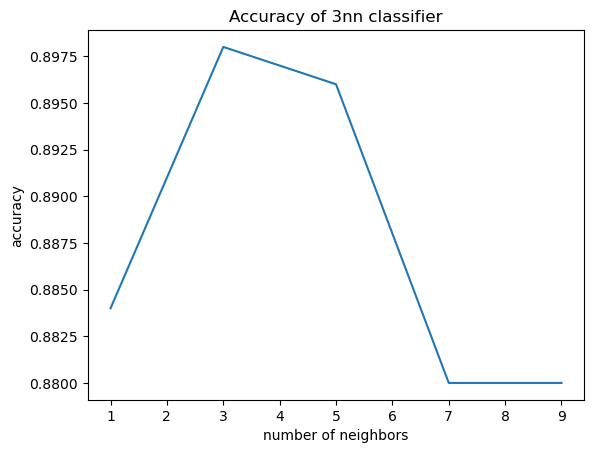

In [15]:
# plotting the points 
plt.plot(num_neighbours, scores2)

plt.title("Accuracy of 3nn classifier")
  
# naming the x axis
plt.xlabel('number of neighbors')
# naming the y axis
plt.ylabel('accuracy')
  
# function to show the plot
plt.show()

In [16]:
# b)
num_neighbors = [1, 3, 5, 7, 9]
scores1 = [knnClassifier.accuracy_score(test_images, test_labels, n, 'l1') for n in num_neighbours]
print(scores2)

[0.884, 0.898, 0.896, 0.88, 0.88]


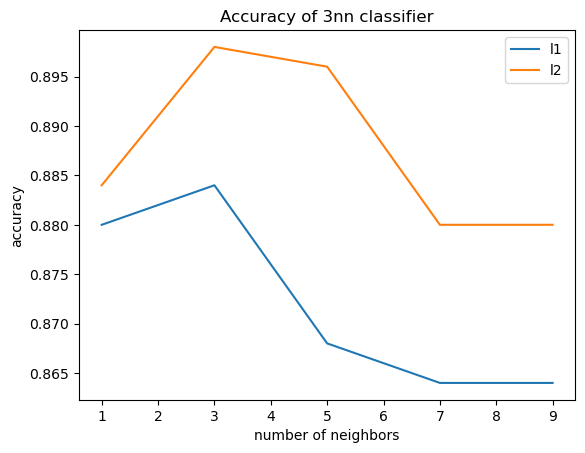

In [17]:
# plotting the points 
plt.plot(num_neighbors, scores1, label = 'l1')
plt.plot(num_neighbors, scores2, label = 'l2')

plt.title("Accuracy of 3nn classifier")

# naming the x axis
plt.xlabel('number of neighbors')
# naming the y axis
plt.ylabel('accuracy')

plt.legend()
  
# function to show the plot
plt.show()